In [67]:
import numpy as np
import subprocess
from subprocess import PIPE, Popen
import serpentTools
from matplotlib import pyplot as plt

In [68]:
process = Popen(['find', '.', '-name', '*res.m'], stdout=PIPE, stderr=PIPE)
stdout, stderr = process.communicate()

In [69]:
paths = stdout.decode('utf-8').split("\n")

In [70]:
paths.pop()

''

In [53]:
readers = [0]*len(paths)
resData = [0]*len(paths)
keff = np.zeros(len(paths))
index = np.linspace(1, len(readers), len(readers))

In [54]:
for i in range(0, len(paths)):
    readers[i] = serpentTools.read(paths[i])
    resData[i] = readers[i].resdata
    keff[i] = resData[i]["absKeff"][0]

SERPENT Serpent 2.1.32 found in ./Sens10/s8c4_drumSens10.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in ./Sens2/s8c4_drumSens2.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in ./Sens5/s8c4_drumSens5.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in ./Sens4/s8c4_drumSens4.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in ./Sens3/s8c4_drumSens3.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.1.32 found in .

In [62]:
print(max(keff))
print(min(keff))
print(1e5*(min(keff) - max(keff)))

0.998016
0.997443
-57.30000000000457


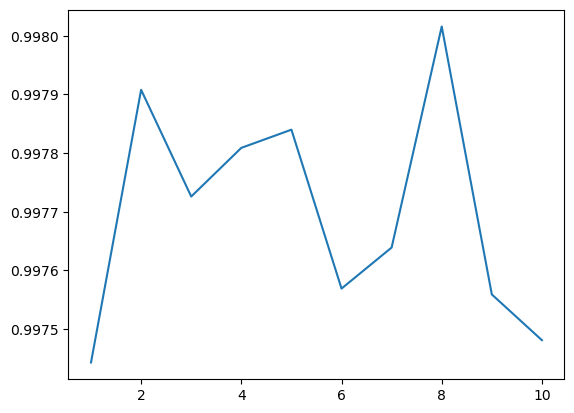

In [63]:
plt.plot(index, keff)

In [64]:
print(keff)

[0.997443 0.997908 0.997726 0.997809 0.99784  0.997569 0.997639 0.998016
 0.997559 0.997481]


In [74]:
def rho(keff):
    return (keff - 1)/keff